In [50]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [51]:
db_bp = pd.read_csv('diabetes2.csv')

In [52]:
db_bp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
db_bp.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
db_bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [54]:
db_bp.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [55]:
# cleaning data   
db = db_bp[(db_bp['BloodPressure']!=0)&(db_bp['Insulin']!=0)&(db_bp['SkinThickness']!=0)&(db_bp['BMI']!=0)&(db_bp['Glucose'])!=0]

In [56]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,3.161616,124.868687,69.808081,28.636364,167.494949,33.051010,0.519515,30.348485,0.328283
std,3.080006,31.928901,13.506664,10.385420,136.732231,7.351693,0.366386,9.972285,0.470779
min,0.000000,71.000000,24.000000,7.000000,18.000000,18.200000,0.088000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,19.000000,82.000000,27.725000,0.258250,23.000000,0.000000
50%,2.000000,120.000000,70.000000,29.500000,130.000000,33.300000,0.431500,26.000000,0.000000
75%,5.000000,145.000000,78.000000,36.750000,191.750000,37.350000,0.673750,34.000000,1.000000
max,17.000000,197.000000,110.000000,50.000000,846.000000,67.100000,2.329000,63.000000,1.000000


In [57]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
18,1,103,30,38,83,43.3,0.183,33,0


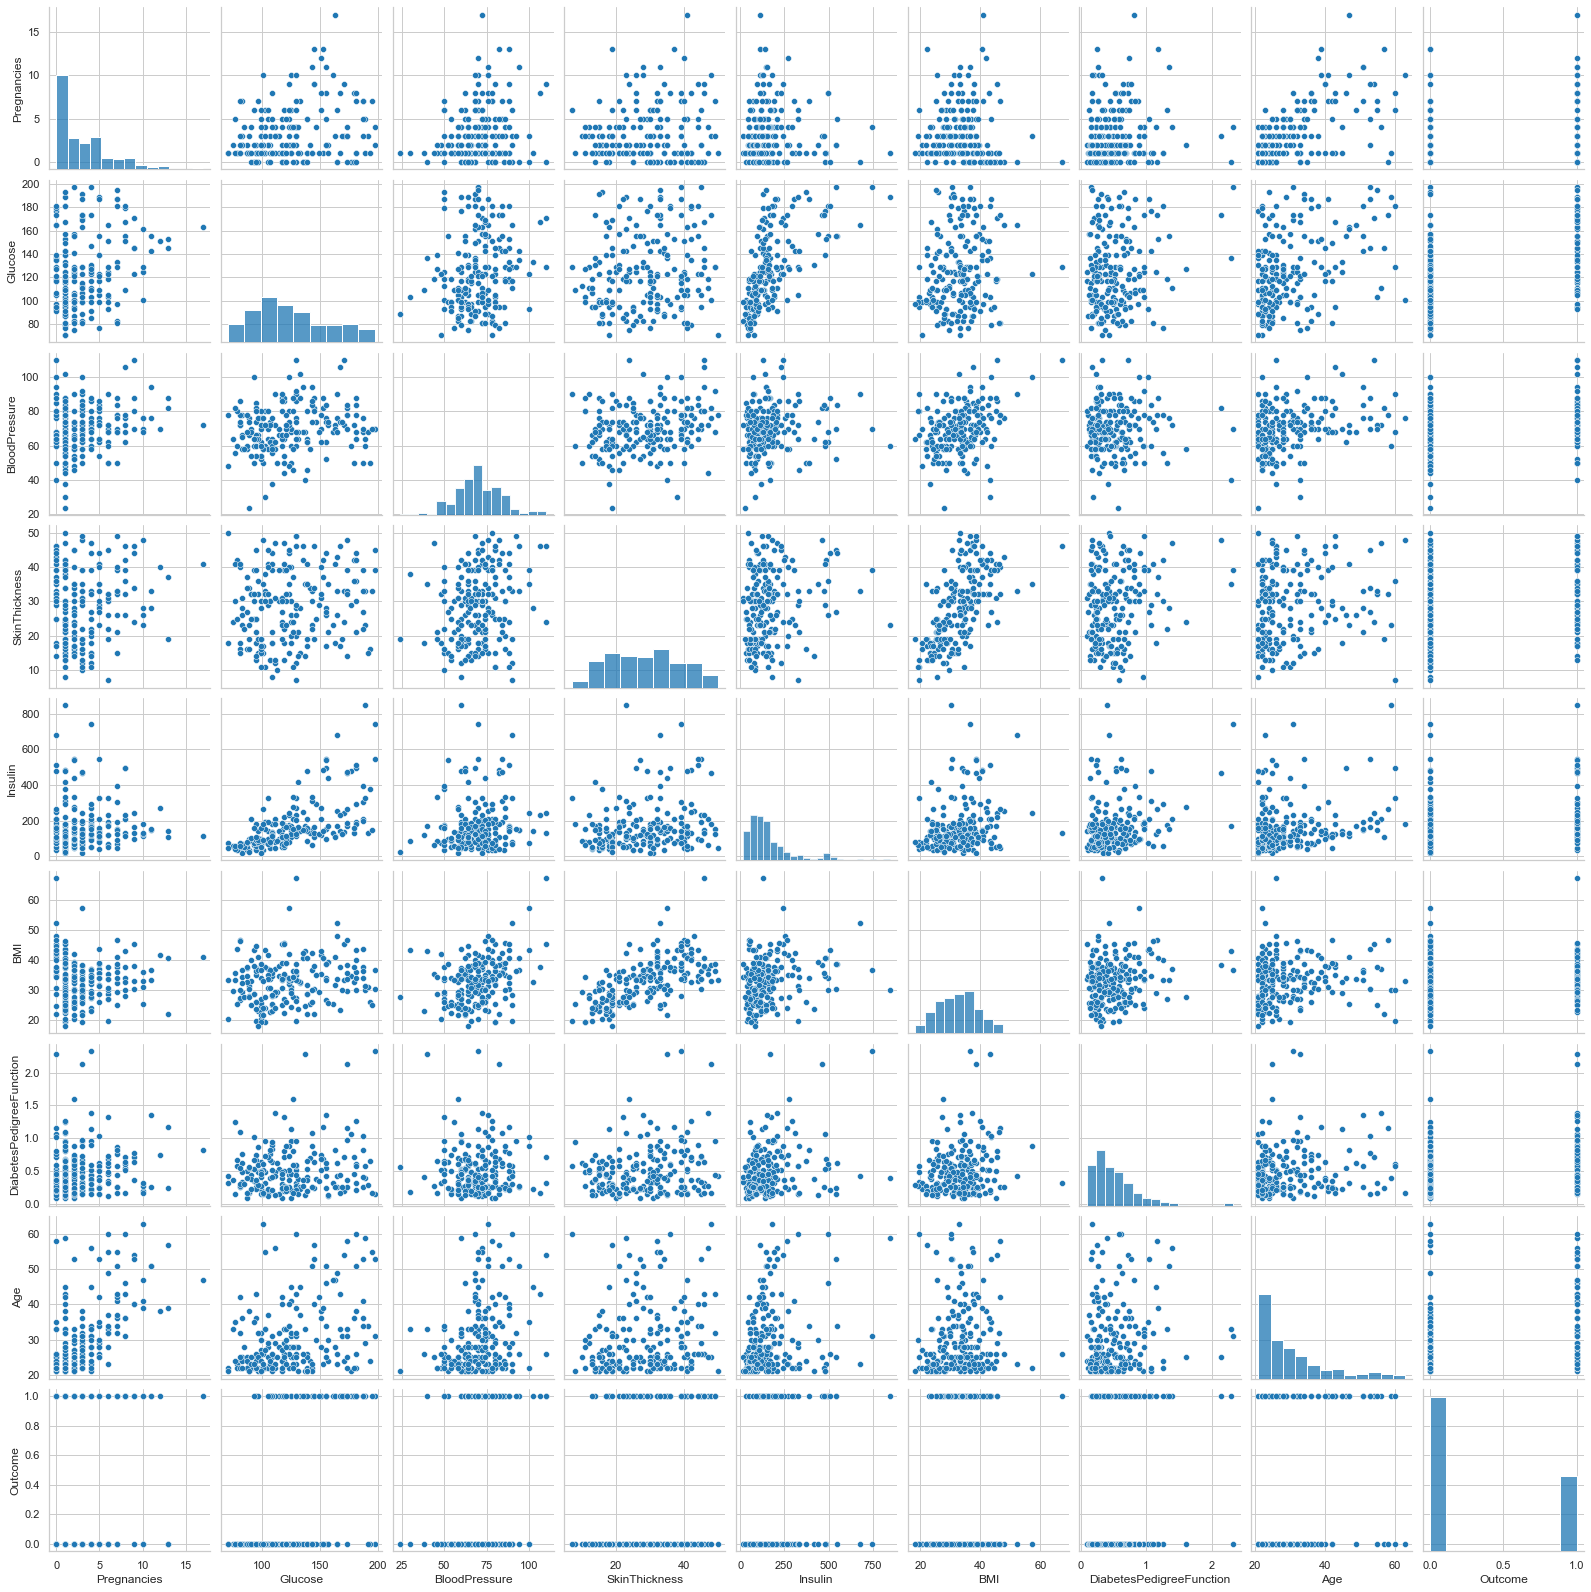

In [58]:
# EDA
sns.pairplot(db)

In [59]:
# you will have to run the following lines of code every time you open this notebook 
import plotly.express as px
fig = px.scatter(data_frame=db,x='BloodPressure',y='Age',)
#print(fig)
fig

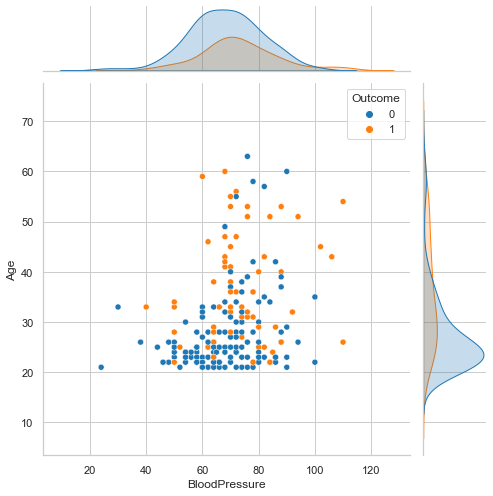

In [60]:
sns.jointplot(x='BloodPressure',y='Age',data=db,kind='scatter',hue='Outcome',height=7)

<AxesSubplot:>

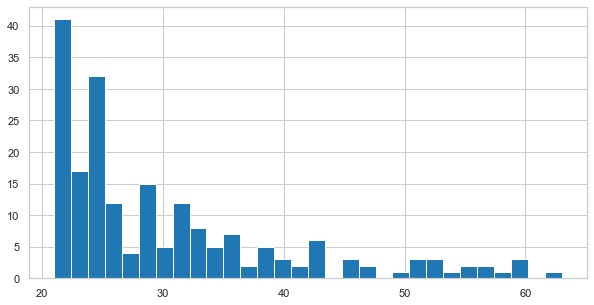

In [74]:
db['Age'].hist(figsize=(10,5),bins=30)

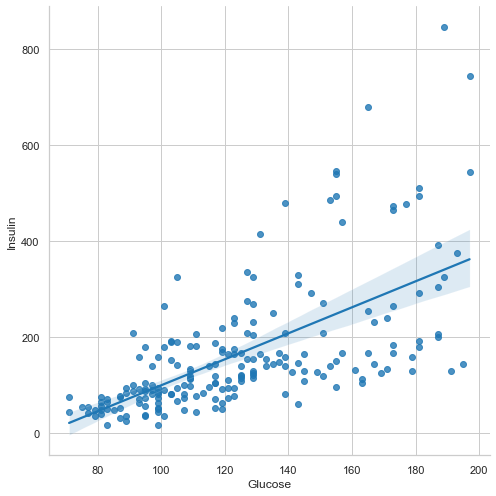

In [62]:
sns.lmplot(x='Glucose',y='Insulin',data=db,height=7,)

C:\Users\KnuckelsBee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



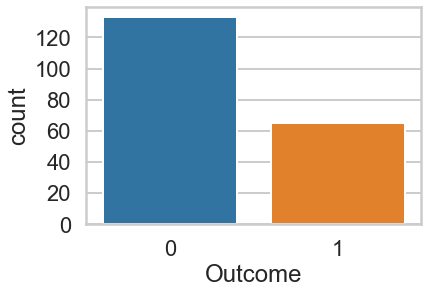

In [63]:
sns.set_context('poster')
sns.countplot('Outcome',data=db,)
sns.set_context('notebook')

In [64]:
# Modelling
X = db[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = db['Outcome']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.45,random_state=0)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()

In [69]:
logmodel.fit(X_train,y_train)

C:\Users\KnuckelsBee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [70]:
predictions = logmodel.predict(X_test)

In [71]:
from sklearn.metrics import classification_report 

In [72]:
print(classification_report(y_test,predictions))
# inbalance classes , not enought data for class 1 hence explains poor f-1 score 

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        69
           1       0.70      0.76      0.73        21

    accuracy                           0.87        90
   macro avg       0.81      0.83      0.82        90
weighted avg       0.87      0.87      0.87        90

